In [1]:
import mglearn
import numpy as np 
import pandas as pd 
import seaborn as sb 
import sklearn.metrics as m
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.simplefilter('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
# Crawaling
# Confirm chrome://version
# https://chromedriver.chromium.org/downloads => version에 맞게 exe 실행 파일 로컬 디스크에 이동 (따로 설치는 안해도됨).
# python 파일이 있는 곳에 img 폴더 만들기.

from urllib.request import urlretrieve # Save network objects (documents from URL addresses) as local files
from urllib.parse import quote_plus    # korean support
from bs4 import BeautifulSoup as bs    # Essential module
from selenium import webdriver         # Google crolling
import os

keyword = input( "Input keyword : " )
crawl_n = int( input( "Input count : ") )
URL     = "https://www.google.com/search?q=" + str( keyword ) + "&hl=ko&tbm=isch"
driver  = webdriver.Chrome('c:/chromedriver.exe')
options = webdriver.ChromeOptions()
options.add_experimental_option( 'excludeSwitches', ['enable-logging'] )
driver.get(URL)

html    = driver.page_source
soup    = bs( html, features="html.parser" )
img     = soup.select('img')
s_list  = []
n       = 1

dir_path = './img/'
os.mkdir(dir_path + "/" + keyword + "/")
path     = dir_path + '/' + keyword + '/'

print("Searching...")
for i in img:
    try:
        s_list.append( i.attrs["src"] )
    except KeyError:
        s_list.append( i.attrs["data-src"] )

print("Downloading...")
for i in s_list:
    print(n)
    urlretrieve( i, path + keyword + str(n) + ".jpg" )
    n+=1
    if n > crawl_n:
        break
    
driver.close()
print("Finish")

Input keyword : 송하윤
Input count : 10
Searching...
Downloading...
1
2
3
4
5
6
7
8
9
10
Finish


In [20]:
data_generator = ImageDataGenerator( rescale=1./255 )
traingen       = data_generator.flow_from_directory("image",target_size=(98, 98), 
                                                    class_mode='sparse', batch_size=800)

Found 630 images belonging to 3 classes.


In [21]:
x_train, y_train = traingen.next()  

In [64]:
traingen.class_indices

{'cap': 0, 'pants': 1, 'shoes': 2}

In [23]:
x_train.shape, y_train.shape

((630, 98, 98, 3), (630,))

In [24]:
### test 과정에서 사용된 model

In [25]:
x_reshape = x_train.reshape(len(x_train), -1)  
model_test= MLPClassifier( hidden_layer_sizes=(90, 22) ,verbose=1, tol=1e-6)
model_test.fit( x_reshape, y_train )

Iteration 1, loss = 13.32691761
Iteration 2, loss = 3.40394123
Iteration 3, loss = 2.37194706
Iteration 4, loss = 2.25193338
Iteration 5, loss = 2.24733321
Iteration 6, loss = 1.64786655
Iteration 7, loss = 1.42367828
Iteration 8, loss = 1.04137294
Iteration 9, loss = 1.06219323
Iteration 10, loss = 1.08455085
Iteration 11, loss = 0.96500960
Iteration 12, loss = 0.86479884
Iteration 13, loss = 0.81711229
Iteration 14, loss = 0.81080817
Iteration 15, loss = 0.81051292
Iteration 16, loss = 0.76835260
Iteration 17, loss = 0.73933310
Iteration 18, loss = 0.72386369
Iteration 19, loss = 0.67178011
Iteration 20, loss = 0.69814449
Iteration 21, loss = 0.78803267
Iteration 22, loss = 0.71794917
Iteration 23, loss = 0.72698372
Iteration 24, loss = 0.63977604
Iteration 25, loss = 0.66712290
Iteration 26, loss = 0.62584647
Iteration 27, loss = 0.63959474
Iteration 28, loss = 0.66174440
Iteration 29, loss = 0.67013220
Iteration 30, loss = 0.68262410
Iteration 31, loss = 0.71205502
Iteration 32, lo

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(90, 22), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=1e-06, validation_fraction=0.1, verbose=1, warm_start=False)

In [26]:
model_test.score( x_reshape, y_train )

0.7111111111111111

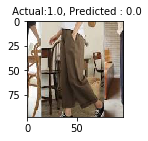

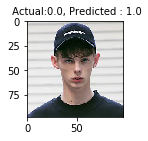

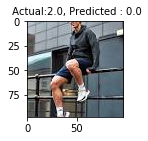

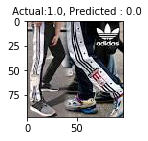

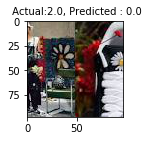

In [27]:
# 잘못된 분류 이미지로 살펴보기. 무엇이 무엇으로 잘못 판단되었는가를 보는것.
# {'cap': 0, 'pants': 1, 'shoes': 2 }
y_pred               = model_test.predict( x_reshape )
index                = 0
misclassficed_Indexs = []

for label, predict in zip( y_train, y_pred ):
    if label != predict:
        misclassficed_Indexs.append( index )
    index += 1

for plotindex, badindex in enumerate( misclassficed_Indexs[0:5] ):
    plt.figure( figsize=( 10,5) )
    plt.subplot( 1, 5, plotindex + 1 )
    plt.imshow( np.reshape( x_train[ badindex ], (98,98,3) ) )
    plt.title( f' Actual:{ y_train[badindex] }, Predicted : { y_pred[badindex] }', fontsize=10)

In [11]:
### 웹에서 이용할 model

In [28]:
x_reshape = x_train.reshape(len(x_train), -1)  
model     = MLPClassifier( hidden_layer_sizes=(90, 22) ,verbose=1, tol=1e-6,  solver='lbfgs' )
model.fit( x_reshape, y_train )

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(90, 22), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=1e-06, validation_fraction=0.1, verbose=1, warm_start=False)

In [29]:
model.score( x_reshape, y_train )

1.0

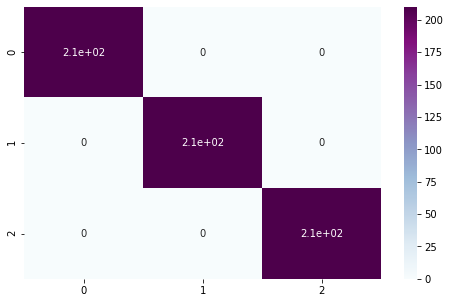

학습시킨 데이터 수 : 630


In [32]:
plt.figure( figsize=(8,5) )
y_pred = model.predict( x_reshape )
CM     = m.confusion_matrix( y_train, y_pred )
sb.heatmap( CM, annot=True, cmap='BuPu' )
plt.show()
print( f'학습시킨 데이터 수 : {len(x_reshape )}' )

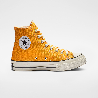

In [52]:
imgData = image.load_img( 'test/test1.jpg', target_size=(98,98) )
testimg = image.img_to_array( imgData )/255
# testimg.shape
imgData  #  'cap': 0, 'pants': 1, 'shoes': 2

In [53]:
model.predict( testimg.reshape(1,-1) )

array([0.], dtype=float32)

In [54]:
# save model
from sklearn.externals import joblib
joblib.dump( model, 'test2.pkl' )

['test2.pkl']

In [59]:
 testimg.reshape(1, -1)

array([[0.8980392 , 0.8980392 , 0.8980392 , ..., 0.89411765, 0.89411765,
        0.89411765]], dtype=float32)

In [55]:
# read model
mymodel = joblib.load( r'./test2.pkl'  )
mymodel.predict( testimg.reshape(1, -1) )[0]

0.0

In [61]:
pred_proba = ( mymodel.predict_proba( testimg.reshape(1,-1) ).max().round(4) )*100
pred_proba 

100.0

In [62]:
 mymodel.predict_proba( testimg.reshape(1,-1) ).sum()

1.0